#CA Housing Price Model Optimization - Joseph Kwan


The purpose of this notebook is to explore the bias-variance trade-off in regression ML model tuning utilizing your Pandas, Scikit-learn, Matplotlib, and IPython Notebooks.  

I will use Scikit-learn's `Lasso()` model to fit a number of Lasso regressions to a CA housing dataset. Each Lasso will be fit using a different value of $\lambda$.

First, I will create a plot that represents MSE for both the training and testing sets for different values of lambda.

Then I will plot the coefficients for each of the housing price predictors for different values of lambdw while dicating the value for lambda with the lowest MSE.

### Import the libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso

### Load the CA housing dataset for use in Google Colab Python Notebook

In [ ]:
# mount google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Read the data and create a dataframe

In [ ]:
# load the data
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/housing2019.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


The total_bedrooms column has missing data that will be imputed using the median.

In [ ]:
total_bedrooms_median = df["total_bedrooms"].median()
df["total_bedrooms"].fillna(value=total_bedrooms_median, inplace=True)

Drop the latitude and longitude columns as I will use ocean_proximity to assess geographic location.

In [ ]:
df.drop(labels=["longitude", "latitude"], axis=1, inplace=True)

In [ ]:
ocean_dummies = pd.get_dummies(df.ocean_proximity, )
df.drop(labels="ocean_proximity", axis=1, inplace=True)
df = df.join(ocean_dummies)
df.head()

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0,0,0,1,0
1,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0,0,0,1,0
2,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0,0,0,1,0
3,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0,0,0,1,0
4,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0,0,0,1,0


## Create training and testing sets

Next, split the dataset in train and test.
For repeatability purposes, rows 0 to 5,000 will be training data, and rows 15,001 to 18,000 as test data. Normally this would be randomly assigned.

In [ ]:
X_train = df.loc[:5000, df.columns != "median_house_value"]
y_train = df.loc[:5000, "median_house_value"][:, np.newaxis]

X_test = df.loc[15000:18000, df.columns != "median_house_value"]
y_test = df.loc[15000:18000, "median_house_value"][:, np.newaxis]


      housing_median_age  total_rooms  ...  NEAR BAY  NEAR OCEAN
0                   41.0        880.0  ...         1           0
1                   21.0       7099.0  ...         1           0
2                   52.0       1467.0  ...         1           0
3                   52.0       1274.0  ...         1           0
4                   52.0       1627.0  ...         1           0
...                  ...          ...  ...       ...         ...
4996                47.0       2212.0  ...         0           0
4997                46.0       2577.0  ...         0           0
4998                46.0       2198.0  ...         0           0
4999                52.0       1283.0  ...         0           0
5000                49.0       2174.0  ...         0           0

[5001 rows x 11 columns]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  """


## Run Lasso Regressions (12 points)

Next, the `Lasso()` from Scikit-learn will be used to fit a set of Lasso regressions for 100 different $\lambda$ values. I will generate
 logarithmically spaced $\lambda$'s between 10 and 1000 with Numpy.

In [ ]:
num_lambdas = 100
lambdas = np.logspace(-3, 3, num_lambdas)

Create some variables to capture the predictions made by each of the models, as well as the model's coefficients. Note that `y_train_hat` has 100 columns, one for each of the models that will be trained.

In [ ]:
y_train_hat = np.zeros((y_train.shape[0], num_lambdas))
y_test_hat = np.zeros((y_test.shape[0], num_lambdas))

coefficients = np.zeros((X_train.shape[1], num_lambdas))

Fit the models by looping through the vector of regularization parameters.

In [ ]:
# Iterating over lambdas, train a model, make predictions, store coeff.
preds = []
coefs = []
for i, current_lambda in enumerate(lambdas):
  # instantiate and fit model (4 points)
  lasso = Lasso(alpha = current_lambda, normalize = True)
  lasso_train = lasso.fit(X_train, y_train)

  # make predictions on the training and testing sets
  # (4) points
  train_lasso = lasso.predict(X_train)
  test_lasso = lasso.predict(X_test)

  # append predictions and coefficients to correct data structures (5)
  # (4 points)
  coefficients[:,i] = lasso.coef_
  y_train_hat[:, i] = train_lasso
  y_test_hat[:, i] = test_lasso
  print(lasso.coef_)



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 211026803800.7754, tolerance: 5795886434.945926
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 211029246834.83203, tolerance: 5795886434.945926
  positive)


[ 5.06796111e+02 -1.34327668e+00  4.88626021e+01 -4.48690829e+01
  9.77907372e+01  3.54836407e+04  7.19593893e+04 -3.35220229e+04
  0.00000000e+00  2.71757974e+04 -3.37006521e+04]
[ 5.06795513e+02 -1.34318719e+00  4.88624613e+01 -4.48689793e+01
  9.77901787e+01  3.54836118e+04  7.19502803e+04 -3.35311702e+04
  0.00000000e+00  2.71666715e+04 -3.37097298e+04]


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 211032055139.0332, tolerance: 5795886434.945926
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 211035283760.9746, tolerance: 5795886434.945926
  positive)


[ 5.06794827e+02 -1.34308430e+00  4.88622993e+01 -4.48688603e+01
  9.77895366e+01  3.54835786e+04  7.19398072e+04 -3.35416875e+04
  0.00000000e+00  2.71561790e+04 -3.37201670e+04]
[ 5.06794037e+02 -1.34296600e+00  4.88621132e+01 -4.48687235e+01
  9.77887984e+01  3.54835404e+04  7.19277657e+04 -3.35537798e+04
  0.00000000e+00  2.71441151e+04 -3.37321672e+04]


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 211038995019.02148, tolerance: 5795886434.945926
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 211043261367.63867, tolerance: 5795886434.945926
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 211048165610.07617, tolerance: 5795886434.945926
  positive)


[ 5.06793130e+02 -1.34282998e+00  4.88618991e+01 -4.48685662e+01
  9.77879496e+01  3.54834965e+04  7.19139209e+04 -3.35676830e+04
  0.00000000e+00  2.71302445e+04 -3.37459645e+04]
[ 5.06792086e+02 -1.34267359e+00  4.88616530e+01 -4.48683853e+01
  9.77869736e+01  3.54834460e+04  7.18980027e+04 -3.35836683e+04
  0.00000000e+00  2.71142968e+04 -3.37618280e+04]
[ 5.06790886e+02 -1.34249378e+00  4.88613700e+01 -4.48681773e+01
  9.77858515e+01  3.54833879e+04  7.18797006e+04 -3.36020475e+04
  0.00000000e+00  2.70959607e+04 -3.37800672e+04]


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 211053802874.77344, tolerance: 5795886434.945926
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 211060282317.56055, tolerance: 5795886434.945926
  positive)


[ 5.06789507e+02 -1.34228705e+00  4.88610446e+01 -4.48679382e+01
  9.77845614e+01  3.54833211e+04  7.18586577e+04 -3.36231791e+04
  0.00000000e+00  2.70748787e+04 -3.38010379e+04]
[ 5.06787921e+02 -1.34204935e+00  4.88606705e+01 -4.48676633e+01
  9.77830781e+01  3.54832444e+04  7.18344634e+04 -3.36474753e+04
  0.00000000e+00  2.70506395e+04 -3.38251490e+04]


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 211067729721.64062, tolerance: 5795886434.945926
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 211076288902.35938, tolerance: 5795886434.945926
  positive)


[ 5.06786097e+02 -1.34177606e+00  4.88602404e+01 -4.48673472e+01
  9.77813726e+01  3.54831561e+04  7.18066459e+04 -3.36754100e+04
  0.00000000e+00  2.70227704e+04 -3.38528710e+04]
[ 5.06784000e+02 -1.34146184e+00  4.88597459e+01 -4.48669837e+01
  9.77794118e+01  3.54830546e+04  7.17746626e+04 -3.37075282e+04
  0.00000000e+00  2.69907276e+04 -3.38847446e+04]


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 211086125580.3086, tolerance: 5795886434.945926
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 211097429626.74023, tolerance: 5795886434.945926
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 211110418722.94922, tolerance: 5795886434.945926
  positive)


[ 5.06781589e+02 -1.34110056e+00  4.88591773e+01 -4.48665659e+01
  9.77771572e+01  3.54829379e+04  7.17378895e+04 -3.37444563e+04
  0.00000000e+00  2.69538862e+04 -3.39213914e+04]
[ 5.06778818e+02 -1.34068518e+00  4.88585235e+01 -4.48660854e+01
  9.77745651e+01  3.54828038e+04  7.16956093e+04 -3.37869146e+04
  0.00000000e+00  2.69115275e+04 -3.39635263e+04]
[ 5.06775631e+02 -1.34020760e+00  4.88577719e+01 -4.48655330e+01
  9.77715847e+01  3.54826495e+04  7.16469975e+04 -3.38357314e+04
  0.00000000e+00  2.68628254e+04 -3.40119713e+04]


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 211125342918.26562, tolerance: 5795886434.945926
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 211142488661.94922, tolerance: 5795886434.945926
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 211162184360.7754, tolerance: 5795886434.945926
  positive)


[ 5.06771966e+02 -1.33965849e+00  4.88569077e+01 -4.48648979e+01
  9.77681581e+01  3.54824722e+04  7.15911056e+04 -3.38918588e+04
  0.00000000e+00  2.68068297e+04 -3.40676712e+04]
[ 5.06767754e+02 -1.33902715e+00  4.88559141e+01 -4.48641677e+01
  9.77642182e+01  3.54822683e+04  7.15268436e+04 -3.39563917e+04
  0.00000000e+00  2.67424483e+04 -3.41317126e+04]
[ 5.06762910e+02 -1.33830126e+00  4.88547716e+01 -4.48633281e+01
  9.77596884e+01  3.54820338e+04  7.14529578e+04 -3.40305888e+04
  0.00000000e+00  2.66684254e+04 -3.42053446e+04]


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 211184806123.01758, tolerance: 5795886434.945926
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 211210784623.41797, tolerance: 5795886434.945926
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 211240612548.04102, tolerance: 5795886434.945926
  positive)


[ 5.06757340e+02 -1.33746666e+00  4.88534581e+01 -4.48623627e+01
  9.77544801e+01  3.54817643e+04  7.13680072e+04 -3.41158975e+04
  0.00000000e+00  2.65833170e+04 -3.42900035e+04]
[ 5.06750937e+02 -1.33650708e+00  4.88519479e+01 -4.48612528e+01
  9.77484919e+01  3.54814543e+04  7.12703346e+04 -3.42139818e+04
  0.00000000e+00  2.64854630e+04 -3.43873407e+04]
[ 5.06743575e+02 -1.33540379e+00  4.88502115e+01 -4.48599767e+01
  9.77416069e+01  3.54810980e+04  7.11580349e+04 -3.43267548e+04
  0.00000000e+00  2.63729547e+04 -3.44992548e+04]
[ 5.06735110e+02 -1.33413528e+00  4.88482151e+01 -4.48585095e+01
  9.77336909e+01  3.54806883e+04  7.10289175e+04 -3.44564164e+04
  0.00000000e+00  2.62435975e+04 -3.46279289e+04]


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 211274853161.25586, tolerance: 5795886434.945926
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 211314149822.0918, tolerance: 5795886434.945926
  positive)


[ 5.06725378e+02 -1.33267680e+00  4.88459197e+01 -4.48568226e+01
  9.77245893e+01  3.54802173e+04  7.08804638e+04 -3.46054957e+04
  0.00000000e+00  2.60948681e+04 -3.47758728e+04]
[ 5.06714188e+02 -1.33099990e+00  4.88432806e+01 -4.48548830e+01
  9.77141248e+01  3.54796757e+04  7.07097782e+04 -3.47769008e+04
  0.00000000e+00  2.59238655e+04 -3.49459723e+04]


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 211359236645.69336, tolerance: 5795886434.945926
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 211410950218.21875, tolerance: 5795886434.945926
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 211470242588.65234, tolerance: 5795886434.945926
  positive)


[ 5.06701322e+02 -1.32907188e+00  4.88402462e+01 -4.48526530e+01
  9.77020930e+01  3.54790530e+04  7.05135312e+04 -3.49739749e+04
  0.00000000e+00  2.57272540e+04 -3.51415454e+04]
[ 5.06686530e+02 -1.32685512e+00  4.88367574e+01 -4.48500890e+01
  9.76882595e+01  3.54783370e+04  7.02878949e+04 -3.52005622e+04
  0.00000000e+00  2.55011986e+04 -3.53664069e+04]


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 211538195409.99805, tolerance: 5795886434.945926
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 211616035146.67188, tolerance: 5795886434.945926
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 211705149215.0625, tolerance: 5795886434.945926
  positive)


[ 5.06669522e+02 -1.32430638e+00  4.88327461e+01 -4.48471410e+01
  9.76723543e+01  3.54775138e+04  7.00284679e+04 -3.54610826e+04
  0.00000000e+00  2.52412898e+04 -3.56249431e+04]
[ 5.06649968e+02 -1.32137596e+00  4.88281341e+01 -4.48437515e+01
  9.76540672e+01  3.54765674e+04  6.97301900e+04 -3.57606177e+04
  0.00000000e+00  2.49424579e+04 -3.59221968e+04]
[ 5.06627484e+02 -1.31800668e+00  4.88228314e+01 -4.48398545e+01
  9.76330414e+01  3.54754792e+04  6.93872428e+04 -3.61050103e+04
  0.00000000e+00  2.45988738e+04 -3.62639663e+04]


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 211807102825.19727, tolerance: 5795886434.945926
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 211923655917.2832, tolerance: 5795886434.945926
  positive)


[ 5.06601634e+02 -1.31413283e+00  4.88167346e+01 -4.48353738e+01
  9.76088669e+01  3.54742280e+04  6.89929369e+04 -3.65009781e+04
  0.00000000e+00  2.42038355e+04 -3.66569183e+04]
[ 5.06571913e+02 -1.30967884e+00  4.88097248e+01 -4.48302221e+01
  9.75810721e+01  3.54727895e+04  6.85395809e+04 -3.69562449e+04
  0.00000000e+00  2.37496376e+04 -3.71087175e+04]


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 212056779537.29883, tolerance: 5795886434.945926
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 212208670631.59375, tolerance: 5795886434.945926
  positive)


[ 5.06537741e+02 -1.30455784e+00  4.88016652e+01 -4.48242990e+01
  9.75491148e+01  3.54711356e+04  6.80183317e+04 -3.74796910e+04
  0.00000000e+00  2.32274203e+04 -3.76281769e+04]
[ 5.06498451e+02 -1.29866993e+00  4.87923987e+01 -4.48174887e+01
  9.75123717e+01  3.54692339e+04  6.74190218e+04 -3.80815269e+04
  0.00000000e+00  2.26269973e+04 -3.82254289e+04]


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 212381763480.0996, tolerance: 5795886434.945926
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 212578735810.60547, tolerance: 5795886434.945926
  positive)


[ 5.06453277e+02 -1.29190027e+00  4.87817444e+01 -4.48096587e+01
  9.74701260e+01  3.54670475e+04  6.67299610e+04 -3.87734919e+04
  0.00000000e+00  2.19366567e+04 -3.89121235e+04]
[ 5.06401338e+02 -1.28411680e+00  4.87694945e+01 -4.48006560e+01
  9.74215538e+01  3.54645336e+04  6.59377086e+04 -3.95690835e+04
  0.00000000e+00  2.11429328e+04 -3.97016555e+04]


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 212802506208.375, tolerance: 5795886434.945926
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 213056218650.69336, tolerance: 5795886434.945926
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 213343208128.66016, tolerance: 5795886434.945926
  positive)


[ 5.06341621e+02 -1.27516770e+00  4.87554102e+01 -4.47903050e+01
  9.73657076e+01  3.54616433e+04  6.50268108e+04 -4.04838205e+04
  0.00000000e+00  2.02303433e+04 -4.06094255e+04]
[ 5.06272961e+02 -1.26487841e+00  4.87392166e+01 -4.47784040e+01
  9.73014979e+01  3.54583201e+04  6.39794997e+04 -4.15355457e+04
  0.00000000e+00  1.91810870e+04 -4.16531403e+04]
[ 5.06194019e+02 -1.25304823e+00  4.87205979e+01 -4.47647207e+01
  9.72276725e+01  3.54544993e+04  6.27753464e+04 -4.27447742e+04
  0.00000000e+00  1.79746973e+04 -4.28531587e+04]


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 213666939129.69727, tolerance: 5795886434.945926
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 214030905954.52734, tolerance: 5795886434.945926
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 214438479744.19336, tolerance: 5795886434.945926
  positive)


[ 5.06103254e+02 -1.23944640e+00  4.86991909e+01 -4.47489882e+01
  9.71427911e+01  3.54501062e+04  6.13908627e+04 -4.41350931e+04
  0.00000000e+00  1.65876423e+04 -4.42328883e+04]
[ 5.05998897e+02 -1.22380760e+00  4.86745781e+01 -4.47308997e+01
  9.70451982e+01  3.54450553e+04  5.97990430e+04 -4.57336220e+04
  0.00000000e+00  1.49928661e+04 -4.58192421e+04]
[ 5.05878911e+02 -1.20582677e+00  4.86462793e+01 -4.47101023e+01
  9.69329901e+01  3.54392480e+04  5.79688371e+04 -4.75715417e+04
  0.00000000e+00  1.31592611e+04 -4.76431634e+04]


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 214892681914.14258, tolerance: 5795886434.945926
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 215395856653.9922, tolerance: 5795886434.945926
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 215949205812.78516, tolerance: 5795886434.945926
  positive)


[ 5.05740957e+02 -1.18515320e+00  4.86137426e+01 -4.46861904e+01
  9.68039780e+01  3.54325709e+04  5.58645450e+04 -4.96847028e+04
  0.00000000e+00  1.10510608e+04 -4.97402297e+04]
[ 5.05582343e+02 -1.16138361e+00  4.85763333e+01 -4.46586974e+01
  9.66556455e+01  3.54248940e+04  5.34451205e+04 -5.21143246e+04
  0.00000000e+00  8.62714278e+03 -5.21513463e+04]
[ 5.05399976e+02 -1.13405436e+00  4.85333218e+01 -4.46270872e+01
  9.64850991e+01  3.54160673e+04  5.06633703e+04 -5.49077992e+04
  0.00000000e+00  5.84022610e+03 -5.49235446e+04]


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 216552137037.22266, tolerance: 5795886434.945926
  positive)


[ 5.05190297e+02 -1.10263236e+00  4.84838689e+01 -4.45907432e+01
  9.62890122e+01  3.54059188e+04  4.74650335e+04 -5.81196162e+04
  0.00000000e+00  2.63594914e+03 -5.81108989e+04]
[ 5.04580527e+02 -1.06728324e+00  4.84301624e+01 -4.45470838e+01
  9.60582633e+01  3.53929563e+04  4.47849593e+04 -6.08111750e+04
  0.00000000e+00  0.00000000e+00 -6.07646363e+04]
[ 5.04227933e+02 -1.02594811e+00  4.83657946e+01 -4.44983129e+01
  9.57970326e+01  3.53792926e+04  4.47837865e+04 -6.08292687e+04
  0.00000000e+00  0.00000000e+00 -6.07487597e+04]
[ 5.03841133e+02 -9.78343281e-01  4.82912957e+01 -4.44426487e+01
  9.54978061e+01  3.53636326e+04  4.47837221e+04 -6.08490624e+04
  0.00000000e+00  0.00000000e+00 -6.07296616e+04]
[ 5.03411406e+02 -9.23545205e-01  4.82052435e+01 -4.43789794e+01
  9.51546759e+01  3.53456675e+04  4.47846836e+04 -6.08710060e+04
  0.00000000e+00  0.00000000e+00 -6.07070230e+04]
[ 5.02862612e+02 -8.60774530e-01  4.81077507e+01 -4.43045677e+01
  9.47568491e+01  3.53248654e+04  4

## Compute MSEs


In [ ]:
mse_train, mse_test = None, None

mse_train, mse_test = np.zeros(num_lambdas), np.zeros(num_lambdas)

for n in range(num_lambdas):
  mse_train[n] = np.mean((y_train[:,0] - y_train_hat[:, n])**2)
  mse_test[n] = np.mean((y_test[:,0] - y_test_hat[:, n])**2)

## Plot the model accuracy as $\lambda$ changes

First, I determine which choice of $\lambda$ lead to the smalles test MSE.  Then, I will store the index of this $\lambda$ value in a variable called `min_lambda_idx`.

In [ ]:
minidx = np.argmin(mse_test)

Plot the MSE values as lambda increases. Marking the point with the lowest MSE.

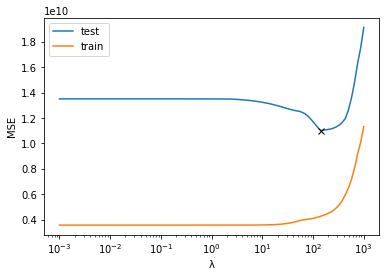

In [ ]:
plt.plot(lambdas, mse_test, label = "test")
plt.plot(lambdas, mse_train, label = "train")
plt.plot(lambdas[minidx], mse_test[minidx], marker="x", color='000000')
plt.ylabel('MSE')
plt.xlabel('λ')
plt.xscale('log')
plt.legend()
plt.show()

## Plot coefficient sizes as $\lambda$ changes



I will see how the regularization changed affected the choice of coefficient by the Lasso model.

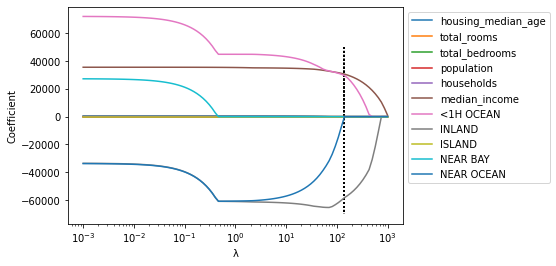

In [ ]:
num_predictors = X_train.shape[1]

# your code continues here
columns = df.loc[:, df.columns != 'median_house_value'].columns
for i in range(num_predictors):
 plt.plot(lambdas, coefficients[i, :], label=columns[i])
 plt.xscale('log')
 plt.xlabel('λ')
 plt.ylabel('Coefficient')
 plt.vlines(lambdas[minidx], 50000, -70000, linestyles= "dotted")
 plt.legend(bbox_to_anchor=(1, 1), loc='upper left', ncol=1)

#Key takeaways
The drivers of price in this market are <1H Ocean, median_income, and INLAND. At the value of lambda with the smallest MSE, these variables have the coefficients with the greatest magnitudes. we also observe as the model has a greater shrinking coefficient how variables become eliminated from the model. POssible variables that were not included in this dataset but would be valuable for a future study would include sq footage of the house as well as the type of house (single family, condo, etc).

A varible that is derived from the current dataset that could be useful would be sq_ft. This measure would provide the amount of square footage in the house as that is a common used metric to measure the size of a piece of real estate.

A variable that could be pulled from an external source would be the house type. This would consist of series of dummy variables that would determine whether somehting was a house, apartment or other type of housing. Pricing varies a lot by the type of housing in an area.